# Question 1

a) Download the "Boston1.csv" database, and explore the data. Explanation about the dataset can be found here: http://www.clemson.edu/economics/faculty/wilson/R-tutorial/analyzing_data.html

Find the columns with missing values and filter them out of the data.

In [10]:
import pandas as pd
import numpy as np
from IPython.display import display

df = pd.read_csv("Boston1.csv")

print("Columns with missing values:")
res = pd.isnull(df).sum()
for key,value in res.iteritems():
    if (value > 0):
        print(key)
# Filter that columns out of the data.
df = df.dropna(axis = 1, how ='any')

Columns with missing values:
misData


b) Divide the filtered data randomly into a train set (70% of the data) and test set (30% of the data).

In [11]:
train = df.sample(frac=0.7)
test = df.drop(train.index)

# Question 2

If you haven't done this previously, install the scikit-learn package for python.

a) On the train set, run a linear regression model as follows:
Divide the training set into explanatory variables (the X matrix with which we'll try to make a prediction) and a target variable (y, the value which we'll try to predict). Use the 'medv' attribute as the target variable y and the rest of the features as the X matrix. Run a linear regression model on those sets, and print the regression coefficients. 

In [3]:
from IPython.display import display
import matplotlib as mpl
from sklearn.linear_model import LinearRegression

model = LinearRegression()
train_x = train.drop(['medv'],axis=1)
train_y = train['medv']
model.fit(train_x,train_y)

i=0;
print("Regression coefficients by attribute:")
for col_lab in train_x.axes[1]:
    print(col_lab,":",model.coef_[i])
    i+=1

Regression coefficients by attribute:
crim : -0.08198171559399449
zn : 0.03617654484314045
indus : -0.013114399033058973
chas : 2.452851447427105
nox : -18.717773959723512
rm : 4.45013348860549
age : -0.008707851666307099
dis : -1.648747007843591
rad : 0.21601646087013027
tax : -0.00956999173345296
ptratio : -1.0153924636202987
black : 0.009839806088108282
lstat : -0.5094595889536119
randCol : 0.976633863163581


b) Use the linear regression model to predict the values of the test set's 'medv' column, based on the test set's other attributes. Print the Mean Squared Error of the model on the train set and on the test set.
Usually, the MSE on the train set would be lower than the MSE on the test set, since the model parameters are optimized with respect to the train set. Must this always be the case? Can you think of a few examples for when this might not be the case?

In [4]:
from sklearn.metrics import mean_squared_error as mse

test_x = test.drop(['medv'],axis=1)
test_y = test['medv']

predicted_y_train = model.predict(train_x)
predicted_y_test = model.predict(test_x)
print("Train set MSE:",mse(predicted_y_train, train_y))
print("Test set MSE:",mse(predicted_y_test, test_y))

Train set MSE: 20.880763213595742
Test set MSE: 25.900584529128515


An example in which the MSE on the test set may be lower than the MSE on the train set is when we have different groups and each of them has perfect linear correlation, but each has different coefficient. Let's say we have 3 different groups as stated, with matching coefficients - n, m, l - and n < m < l. We can pick our test set to include samples mostly from the group with coefficient n the predicted attribute will be closer to the linear model than the predicted attribute of samples from the group with coefficient m. So that will create a test set with a lower MSE than the one on the train set, which will be more scattered.

c) Add some noise (with mean=0, std=1) to the test set's y, and predict it again. What happened to the MSE? Why?

In [9]:
noise = np.random.normal(0, 1, len(test_y.index))
noised_test_y = test_y + noise
print("Test set MSE:",mse(predicted_y_test, noised_test_y))

Test set MSE: 26.10444866946172


The MSE slightly changed but is still very close to the original MSE, because the noise distribution is normal, and it is added to the real y values that are also normally distributed, and so the result is a normal distribution with slightly higher sd and the same expectance.Some y values got a little closer to the model and others moved farther but all in all they maintained their over all distance from the model.

# Question 3

a) Create a Recursive feature elimination model, with a linear regression estimator, that selects half of the original number of features. Hint: Check the feature_selection module in scikit-learn.

In [12]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

mdl = LinearRegression()

rfe = RFE(mdl)

b) Use the feature elimination model on the full database (after filtering columns with missing values, before partitioning into train/test). Print the features that were selected. Remember that we separate the 'medv' attribute to be our y, while the rest of the attributes in the dataset serve as features to learn from.

In [13]:
X = df.drop(['medv'],axis=1)
y = df['medv']
selected_model = rfe.fit(X,y)
print("The selected features are:")
print(X.columns[selected_model.support_].get_values())

The selected features are:
['chas' 'nox' 'rm' 'dis' 'ptratio' 'lstat' 'randCol']


c) We'd like to find out the optimal number of features. Create feature elimination models (with linear regression estimators) for every number of features between 1 and n (where n = all the original features, 'medv' excluded). For each number of features, run a linear regression as in Question 2, only on the selected features, in order to predict 'medv'. Print the Mean Sqaured Error for each number of features.

In [14]:
from sklearn.metrics import mean_squared_error as mse

res_mse = (df.shape[1]-1) * [(0,0)] 
train_x = train.drop(['medv'],axis=1)
train_y = train['medv']
test_x = test.drop(['medv'],axis=1)
test_y = test['medv']

for i in range(1, df.shape[1]):
    rfe3 = RFE(mdl, n_features_to_select= i)
    exe = rfe3.fit(train_x,train_y)
    x_train_c = train[train_x.columns[exe.support_]]
    x_test_c = test[train_x.columns[exe.support_]]
    mdl.fit(x_train_c, train_y)
    res_mse[i-1] = (mse(mdl.predict(x_train_c), train_y), mse(mdl.predict( x_test_c), test_y)) 
    print(" {} fetures:".format(i))
    print("train: {}".format(res_mse[i-1][0]))
    print("test: {}".format(res_mse[i-1][1]))


 1 fetures:
train: 76.5877949125
test: 51.4411998183
 2 fetures:
train: 41.4403565693
test: 34.4612429806
 3 fetures:
train: 39.6357193597
test: 33.0075951287
 4 fetures:
train: 34.3266560362
test: 28.364876106
 5 fetures:
train: 32.6223876102
test: 27.2033576978
 6 fetures:
train: 24.5881631221
test: 22.9027593296
 7 fetures:
train: 24.5672716765
test: 23.0962812508
 8 fetures:
train: 24.2949300049
test: 23.4801528731
 9 fetures:
train: 23.6589585851
test: 23.2363568002
 10 fetures:
train: 23.6067420312
test: 23.0740303016
 11 fetures:
train: 23.4166879586
test: 24.2964944199
 12 fetures:
train: 23.2658178969
test: 23.7001551875
 13 fetures:
train: 22.7784912694
test: 23.1457693268
 14 fetures:
train: 22.1870327015
test: 22.7770007576


d) Conclude the optimal number of features for this task. Think about the cost of adding for data vs the benefit of a more accurate prediction. Explain your answer.

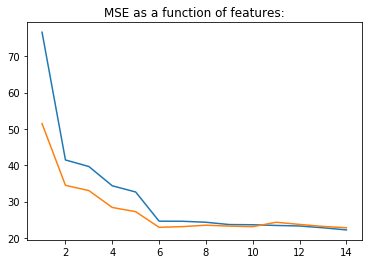

In [15]:
import matplotlib.pyplot as plt

# x is the nubmer of fetures and y is the value of the MSE.
li = list(range(1,15))
mse_train = [val[0] for val in res_mse]
mse_test = [val[1] for val in res_mse]
plt.plot(li,mse_train)
plt.plot(li,mse_test)
plt.title("MSE as a function of features:")
plt.show()

The optimal number of features for this task is 6.
The MSE of the train set and test set are close to each other when using 6 fetures.
Using more features doesn't change much the MSE of the train and test sets.
Therefore, consdering the question of cost of adding for data vs the benefit of a more accurate prediction, 6 features is the optimal number of fetures.

# Question 4

Perform a cross-validation of the linear regression on the train set with K=5. Print the CV scores for each repeat.

In [16]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(mdl, train_x, train_y, cv=5))

[0.70200515 0.71562545 0.78560346 0.71049576 0.73803187]
